In [238]:
# 전처리용
import numpy as np 
import pandas as pd 
# 시각화용
import matplotlib.pyplot as plt 
import seaborn as sns 
# jupyter notebook 내 그래프를 바로 그리기 위한 설정 
%matplotlib inline  
#속도빠르게하기위한건데 고려해볼필요있음
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지) 
plt.rcParams['axes.unicode_minus'] = False
# 한글 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib.font_manager as fm 
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷
# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

import datetime as dt

In [239]:
#from chart_studio import plotly as py
import plotly.offline as plot
import plotly.express as px
import plotly.graph_objs as go


from plotly.subplots import make_subplots

In [240]:

df=pd.read_csv('./DATA/marketing_data.csv')


'ID' : 고객식별ID <br>
'Year_Birth':고객생년 <br>
'Education':고객교육수준 <br>
'Marital_Status':고객결혼여부 <br>
' Income ':고객 연간 가구소득 <br>
'Kidhome' :고객의 어린아이수 <br>
'Teenhome':고객가구의 청소년수 <br>
'Dt_Customer':고객이 회사에 등록한날짜 <br>
'Recency': 고객의 마지막구매 이후일수 <br>
'MntWines' :지난 2년동안 와인에 지출한금액 <br>
'MntFruits':지난 2년동안 과일에 지출한금액 <br>
'MntMeatProducts':지난 2년동안 육류에 지출한금액 <br>
'MntFishProducts':지난 2년동안 생선에 지출한금액 <br>
'MntSweetProducts':지난 2년동안 과자에 지출한금액 <br>
'MntGoldProds' : 지난 2년동안 골드에 지출한금액 <br>
'NumDealsPurchases' : 할인된구매횟수 <br>
'NumWebPurchases' : 회사 웹사이트를 통한 구매건수 <br>
'NumCatalogPurchases' : 카탈로그를 사용한 구매 횟수 <br>
'NumStorePurchases' : 매장에서 직접 구매한 횟수 <br>
'NumWebVisitsMonth' : 지난 달 회사 웹사이트 방문횟수 <br>
'AcceptedCmp3' : 세번째 캠페인에서 수락1 수락X 0 <br>
'AcceptedCmp4' : 네번째 캠페인에서 수락1 수락X 0 <br>
'AcceptedCmp5' : 다섯번째 캠페인에서 수락1 수락X 0 <br>
'AcceptedCmp1' : 첫번째 캠페인에서 수락1 수락X 0 <br>
'AcceptedCmp2' : 두번째 캠페인에서 수락1 수락X 0 <br>
'Response' : 고객이 마지막 캠페인에서 수락1 수락X 0 <br>
'Complain' : 고객이 불만을 제기한경우 1 X 0 <br>
'Country' : 고객이 사는지역 <br>

In [241]:
df = pd.DataFrame(df)

In [242]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [243]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [244]:
# 난 한글이 좋다... 전부 한글로 바꿔버려
df.rename(columns={' Income ':'연간 가구소득'},inplace = True) # 이름변경

df.rename(columns={"Year_Birth":"태어난연도","Marital_Status":"결혼여부","Education":"학력","Country":"소속국가"},inplace=True)

df.rename(columns={'Dt_Customer':'고객정보입력년월일'},inplace=True) # 이름변경

df.rename(columns={'MntWines':'와인지출', 'MntFruits':'과일지출','MntMeatProducts':'육류지출', 'MntFishProducts':'생선지출', 'MntSweetProducts':'과자지출','MntGoldProds':'골드지출'},inplace=True)

df.rename(columns={'Recency':'마지막구매일수','NumWebPurchases':'온라인구매횟수','NumDealsPurchases':'할인된구매횟수', 'NumCatalogPurchases':'전화구매횟수', 'NumStorePurchases':'매장구매횟수','NumWebVisitsMonth':'지난달온라인방문횟수', 'AcceptedCmp3':'3번째캠페인수락유무', 'AcceptedCmp4':'4번째캠페인수락유무', 'AcceptedCmp5':'5번째캠페인수락유무','AcceptedCmp1':'1번째캠페인수락유무', 'AcceptedCmp2':'2번째캠페인수락유무', 'Response':'마지막캠페인수락유무', 'Complain':"불만접수유무"},inplace=True)

df.rename(columns={'Kidhome':'아이수', 'Teenhome':'청소년수'},inplace=True)

In [245]:
df

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,매장구매횟수,지난달온라인방문횟수,3번째캠페인수락유무,4번째캠페인수락유무,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [246]:
df.head()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,매장구매횟수,지난달온라인방문횟수,3번째캠페인수락유무,4번째캠페인수락유무,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [247]:
df.tail()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,매장구매횟수,지난달온라인방문횟수,3번째캠페인수락유무,4번째캠페인수락유무,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [248]:
# df에서 결측값 확인결과 24개가 inicome에서 발견되었다.

df.isnull().sum()

ID             0
태어난연도          0
학력             0
결혼여부           0
연간 가구소득       24
아이수            0
청소년수           0
고객정보입력년월일      0
마지막구매일수        0
와인지출           0
과일지출           0
육류지출           0
생선지출           0
과자지출           0
골드지출           0
할인된구매횟수        0
온라인구매횟수        0
전화구매횟수         0
매장구매횟수         0
지난달온라인방문횟수     0
3번째캠페인수락유무     0
4번째캠페인수락유무     0
5번째캠페인수락유무     0
1번째캠페인수락유무     0
2번째캠페인수락유무     0
마지막캠페인수락유무     0
불만접수유무         0
소속국가           0
dtype: int64

In [249]:
# 중복확인 결과없음
df.duplicated().all()

False

In [250]:
df.columns

Index(['ID', '태어난연도', '학력', '결혼여부', '연간 가구소득', '아이수', '청소년수', '고객정보입력년월일',
       '마지막구매일수', '와인지출', '과일지출', '육류지출', '생선지출', '과자지출', '골드지출', '할인된구매횟수',
       '온라인구매횟수', '전화구매횟수', '매장구매횟수', '지난달온라인방문횟수', '3번째캠페인수락유무', '4번째캠페인수락유무',
       '5번째캠페인수락유무', '1번째캠페인수락유무', '2번째캠페인수락유무', '마지막캠페인수락유무', '불만접수유무',
       '소속국가'],
      dtype='object')

In [251]:
df['총자식수']=df['아이수']+df['청소년수']
df.head()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,지난달온라인방문횟수,3번째캠페인수락유무,4번째캠페인수락유무,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,1,0,0,0,0,0,1,0,SP,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,5,0,0,0,0,1,1,0,CA,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,2,0,0,0,0,0,0,0,US,1
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,7,0,0,0,0,0,0,0,AUS,2
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,7,1,0,0,0,0,1,0,SP,1


In [252]:
# 고객이 우리매장 총 지출액
df['고객의총지출'] = (df['와인지출']+df['과일지출']+df['육류지출']+df['생선지출']+df['골드지출'])
df.head()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,3번째캠페인수락유무,4번째캠페인수락유무,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수,고객의총지출
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,0,0,0,0,0,1,0,SP,0,1001
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,0,0,0,0,1,1,0,CA,0,577
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,0,0,0,0,0,0,0,US,1,249
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,0,0,0,0,0,0,AUS,2,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,1,0,0,0,0,1,0,SP,1,91


In [253]:
df['총구매횟수']=(df['할인된구매횟수']+df['온라인구매횟수']+df['전화구매횟수']+df['매장구매횟수']+df['지난달온라인방문횟수'])
df.head()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,4번째캠페인수락유무,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수,고객의총지출,총구매횟수
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,0,0,0,0,1,0,SP,0,1001,16
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,0,0,0,1,1,0,CA,0,577,23
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,0,0,0,0,0,0,US,1,249,13
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,0,0,0,0,0,0,AUS,2,11,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,0,0,0,0,1,0,SP,1,91,15


In [254]:
# $ 표시 삭제
df['연간 가구소득'] = df['연간 가구소득'].str.replace("$","") # 달러표시는 딱히 필요없으니 삭제

In [255]:
# 타입변환을 위해 특수문자 제거
df['연간 가구소득'] = df['연간 가구소득'].str.replace(',','')# float 데이터가 필요함으로 ,제거
df['연간 가구소득']= df['연간 가구소득'].astype('float') # 타입자체를 float로 변환

In [256]:

df['연간 가구소득'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: 연간 가구소득, dtype: float64

In [257]:
# 중앙값
md=df['연간 가구소득'].median()

In [258]:
df['연간 가구소득'].fillna(md,inplace=True)

In [259]:
# 일단은 안보인다
df.isnull().sum()

ID            0
태어난연도         0
학력            0
결혼여부          0
연간 가구소득       0
아이수           0
청소년수          0
고객정보입력년월일     0
마지막구매일수       0
와인지출          0
과일지출          0
육류지출          0
생선지출          0
과자지출          0
골드지출          0
할인된구매횟수       0
온라인구매횟수       0
전화구매횟수        0
매장구매횟수        0
지난달온라인방문횟수    0
3번째캠페인수락유무    0
4번째캠페인수락유무    0
5번째캠페인수락유무    0
1번째캠페인수락유무    0
2번째캠페인수락유무    0
마지막캠페인수락유무    0
불만접수유무        0
소속국가          0
총자식수          0
고객의총지출        0
총구매횟수         0
dtype: int64

In [260]:
df['고객정보입력년월일']=pd.to_datetime(df['고객정보입력년월일'])#to_datetime으로 년월일로 인식하게변경

In [261]:
df['자식수'] = df['아이수']+df['청소년수']
df.head()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,5번째캠페인수락유무,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수,고객의총지출,총구매횟수,자식수
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,1001,16,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,577,23,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,249,13,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,11,11,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,91,15,1


In [262]:
df['고객등록나이'] = df['고객정보입력년월일'].dt.year-df['태어난연도']

In [263]:
df.head()

,ID,태어난연도,학력,결혼여부,연간 가구소득,아이수,청소년수,고객정보입력년월일,마지막구매일수,와인지출,...,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,1001,16,0,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,577,23,0,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,249,13,1,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,11,11,2,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,91,15,1,25


In [264]:
df = df.drop(['아이수','청소년수'],axis=1) # 딱히 필요없어보여서 자식수로 통일

In [265]:
df.columns

Index(['ID', '태어난연도', '학력', '결혼여부', '연간 가구소득', '고객정보입력년월일', '마지막구매일수', '와인지출',
       '과일지출', '육류지출', '생선지출', '과자지출', '골드지출', '할인된구매횟수', '온라인구매횟수', '전화구매횟수',
       '매장구매횟수', '지난달온라인방문횟수', '3번째캠페인수락유무', '4번째캠페인수락유무', '5번째캠페인수락유무',
       '1번째캠페인수락유무', '2번째캠페인수락유무', '마지막캠페인수락유무', '불만접수유무', '소속국가', '총자식수',
       '고객의총지출', '총구매횟수', '자식수', '고객등록나이'],
      dtype='object')

# 고객들의 연간 가구소득 확인

In [266]:
df['연간 가구소득'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: 연간 가구소득, dtype: float64

In [267]:
# 연간 가구소득이 35538달러 에서 68289달러 사이에 가장 많이 분포되어있다
# 한화 4217만원~8103만원 사이 / 부럽다...

<AxesSubplot:xlabel='연간 가구소득'>

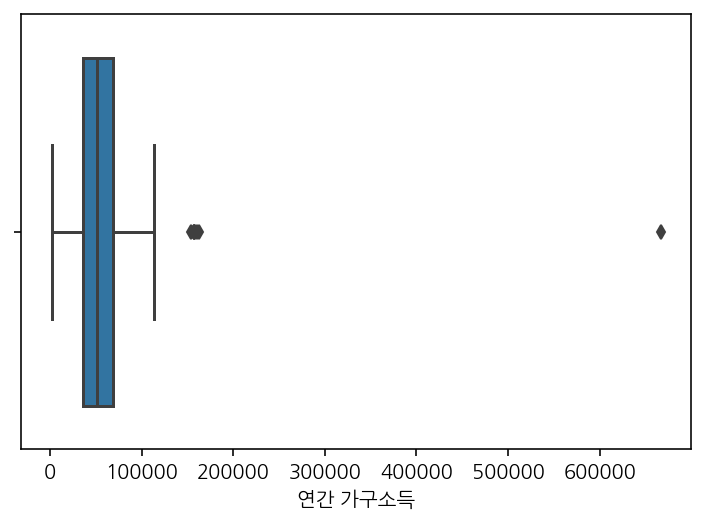

In [268]:
# 박스플롯 그래프 확인
sns.boxplot(df['연간 가구소득'])

<AxesSubplot:xlabel='연간 가구소득', ylabel='Count'>

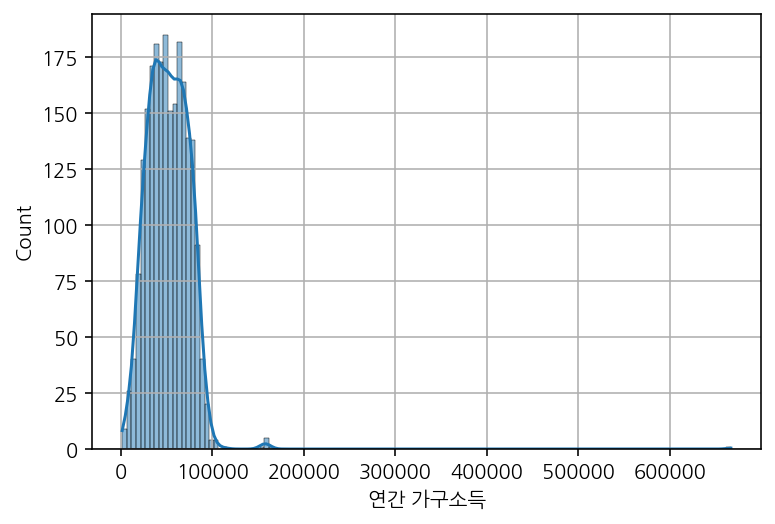

In [269]:
# 히스트플롯 그래프로 확인
# 하지만 이렇게 보는걸로는 분포만 알 수 있을뿐 정확한 수치는 알 수 없다.
plt.grid() # 있는게 더 잘보임
sns.histplot(df['연간 가구소득'],kde=20) 

In [270]:
# 학력 확인 결과 
df['학력'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [271]:
# 한글로 매핑
df['학력'] = df['학력'].map({'PhD':'박사',"2n Cycle":"2년제_학위","Graduation":"학사졸업",'Master':'석사','Basic':'기초학력이수'},na_action=None)
df

,ID,태어난연도,학력,결혼여부,연간 가구소득,고객정보입력년월일,마지막구매일수,와인지출,과일지출,육류지출,...,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이
0,1826,1970,학사졸업,Divorced,84835.0,2014-06-16,0,189,104,379,...,0,0,1,0,SP,0,1001,16,0,44
1,1,1961,학사졸업,Single,57091.0,2014-06-15,0,464,5,64,...,0,1,1,0,CA,0,577,23,0,53
2,10476,1958,학사졸업,Married,67267.0,2014-05-13,0,134,11,59,...,0,0,0,0,US,1,249,13,1,56
3,1386,1967,학사졸업,Together,32474.0,2014-05-11,0,10,0,1,...,0,0,0,0,AUS,2,11,11,2,47
4,5371,1989,학사졸업,Single,21474.0,2014-04-08,0,6,16,24,...,0,0,1,0,SP,1,91,15,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,박사,Divorced,66476.0,2013-03-07,99,372,18,126,...,0,0,0,0,US,1,641,24,1,37
2236,5263,1977,2년제_학위,Married,31056.0,2013-01-22,99,5,10,13,...,0,0,0,0,SP,1,47,13,1,36
2237,22,1976,학사졸업,Divorced,46310.0,2012-12-03,99,185,2,88,...,0,0,0,0,SP,1,304,22,1,36
2238,528,1978,학사졸업,Married,65819.0,2012-11-29,99,267,38,701,...,0,0,0,0,IND,0,1218,23,0,34


In [272]:
# 결혼 여부 확인
df['결혼여부'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [273]:
# 한글로 매핑
df['결혼여부'] = df['결혼여부'].map({'Divorced':'이혼', 'Single':'미혼', 'Married':'기혼', 'Together':'동거', 'Widow':'과부','YOLO':"YOLO",'Absurd':'Absurd','Alone':'1인가구'},na_action=None)
df

,ID,태어난연도,학력,결혼여부,연간 가구소득,고객정보입력년월일,마지막구매일수,와인지출,과일지출,육류지출,...,1번째캠페인수락유무,2번째캠페인수락유무,마지막캠페인수락유무,불만접수유무,소속국가,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이
0,1826,1970,학사졸업,이혼,84835.0,2014-06-16,0,189,104,379,...,0,0,1,0,SP,0,1001,16,0,44
1,1,1961,학사졸업,미혼,57091.0,2014-06-15,0,464,5,64,...,0,1,1,0,CA,0,577,23,0,53
2,10476,1958,학사졸업,기혼,67267.0,2014-05-13,0,134,11,59,...,0,0,0,0,US,1,249,13,1,56
3,1386,1967,학사졸업,동거,32474.0,2014-05-11,0,10,0,1,...,0,0,0,0,AUS,2,11,11,2,47
4,5371,1989,학사졸업,미혼,21474.0,2014-04-08,0,6,16,24,...,0,0,1,0,SP,1,91,15,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,박사,이혼,66476.0,2013-03-07,99,372,18,126,...,0,0,0,0,US,1,641,24,1,37
2236,5263,1977,2년제_학위,기혼,31056.0,2013-01-22,99,5,10,13,...,0,0,0,0,SP,1,47,13,1,36
2237,22,1976,학사졸업,이혼,46310.0,2012-12-03,99,185,2,88,...,0,0,0,0,SP,1,304,22,1,36
2238,528,1978,학사졸업,기혼,65819.0,2012-11-29,99,267,38,701,...,0,0,0,0,IND,0,1218,23,0,34


In [274]:
# 결혼 여부에 따른 총구매 횟수 막대 와 도넛차트로 확인
fig = px.bar(df,x='결혼여부',y='총구매횟수',color='결혼여부')
fig.show()
fig = go.Figure(data = [go.Pie(labels=df['결혼여부'],values=df['총구매횟수'],hole=.3)])
fig.show()

In [275]:
# 학력수준은?
# 고객중 학사졸업고객이 많고 생각보다 박사도 많다
fig = px.bar(df,x='학력',y='총구매횟수',color='학력')
fig.show()
fig = go.Figure(data = [go.Pie(labels=df['학력'],values=df['총구매횟수'],hole=.3)])
fig.show()

In [276]:
df.columns

Index(['ID', '태어난연도', '학력', '결혼여부', '연간 가구소득', '고객정보입력년월일', '마지막구매일수', '와인지출',
       '과일지출', '육류지출', '생선지출', '과자지출', '골드지출', '할인된구매횟수', '온라인구매횟수', '전화구매횟수',
       '매장구매횟수', '지난달온라인방문횟수', '3번째캠페인수락유무', '4번째캠페인수락유무', '5번째캠페인수락유무',
       '1번째캠페인수락유무', '2번째캠페인수락유무', '마지막캠페인수락유무', '불만접수유무', '소속국가', '총자식수',
       '고객의총지출', '총구매횟수', '자식수', '고객등록나이'],
      dtype='object')

In [277]:
df['고객정보입력연도']=df['고객정보입력년월일'].dt.year
df['고객정보입력월']=df['고객정보입력년월일'].dt.month
df['고객정보입력일']=df['고객정보입력년월일'].dt.day
df['고객정보입력요일']=df['고객정보입력년월일'].dt.weekday

In [278]:
df['고객정보입력요일'].unique()

array([0, 6, 1, 2, 5, 4, 3], dtype=int64)

In [279]:
df['고객정보입력요일'] = df['고객정보입력요일'].map({0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'},na_action=None)

In [280]:
df=df.sort_values(by=('고객정보입력년월일'),ascending=True)

In [281]:
df

,ID,태어난연도,학력,결혼여부,연간 가구소득,고객정보입력년월일,마지막구매일수,와인지출,과일지출,육류지출,...,소속국가,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이,고객정보입력연도,고객정보입력월,고객정보입력일,고객정보입력요일
1642,6653,1970,박사,기혼,55158.0,2012-07-30,72,293,0,87,...,SP,2,407,25,2,42,2012,7,30,월
837,6181,1950,2년제_학위,동거,52203.0,2012-07-31,36,488,21,238,...,US,0,831,33,0,62,2012,7,31,화
2222,10001,1985,2년제_학위,동거,7500.0,2012-08-01,98,5,17,17,...,SP,1,86,19,1,27,2012,8,1,수
1509,2611,1959,석사,동거,82576.0,2012-08-01,66,1206,55,445,...,SA,0,1892,20,0,53,2012,8,1,수
1398,7118,1957,학사졸업,기혼,73803.0,2012-08-01,61,833,80,363,...,CA,1,1502,28,1,55,2012,8,1,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,8093,1969,석사,기혼,79734.0,2014-06-28,72,572,8,232,...,SP,0,852,15,0,45,2014,6,28,토
1616,1371,1976,학사졸업,미혼,79941.0,2014-06-28,72,123,164,266,...,AUS,0,954,17,0,38,2014,6,28,토
2201,6722,1954,박사,기혼,70421.0,2014-06-28,98,479,28,136,...,CA,1,753,29,1,60,2014,6,28,토
1122,7300,1952,학사졸업,이혼,69142.0,2014-06-29,50,448,4,34,...,IND,1,531,24,1,62,2014,6,29,일


In [282]:
df['고객정보입력연도'].unique()

array([2012, 2013, 2014], dtype=int64)

In [283]:
x1 = df[df['고객정보입력연도']==2014]
x2 = df[df['고객정보입력연도']==2013]
x3 = df[df['고객정보입력연도']==2012]



In [284]:
df.head(2)

,ID,태어난연도,학력,결혼여부,연간 가구소득,고객정보입력년월일,마지막구매일수,와인지출,과일지출,육류지출,...,소속국가,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이,고객정보입력연도,고객정보입력월,고객정보입력일,고객정보입력요일
1642,6653,1970,박사,기혼,55158.0,2012-07-30,72,293,0,87,...,SP,2,407,25,2,42,2012,7,30,월
837,6181,1950,2년제_학위,동거,52203.0,2012-07-31,36,488,21,238,...,US,0,831,33,0,62,2012,7,31,화


In [285]:
df.columns

Index(['ID', '태어난연도', '학력', '결혼여부', '연간 가구소득', '고객정보입력년월일', '마지막구매일수', '와인지출',
       '과일지출', '육류지출', '생선지출', '과자지출', '골드지출', '할인된구매횟수', '온라인구매횟수', '전화구매횟수',
       '매장구매횟수', '지난달온라인방문횟수', '3번째캠페인수락유무', '4번째캠페인수락유무', '5번째캠페인수락유무',
       '1번째캠페인수락유무', '2번째캠페인수락유무', '마지막캠페인수락유무', '불만접수유무', '소속국가', '총자식수',
       '고객의총지출', '총구매횟수', '자식수', '고객등록나이', '고객정보입력연도', '고객정보입력월', '고객정보입력일',
       '고객정보입력요일'],
      dtype='object')

### 구매 성향 파악

In [286]:
test=df[['와인지출','과일지출','육류지출','생선지출','과자지출','골드지출']]
test.head()

,와인지출,과일지출,육류지출,생선지출,과자지출,골드지출
1642,293,0,87,4,11,23
837,488,21,238,56,108,28
2222,5,17,17,13,14,34
1509,1206,55,445,168,18,18
1398,833,80,363,52,26,174


In [287]:
test1=test.T
test1=pd.DataFrame(test1)

In [288]:
test1

,1642,837,2222,1509,1398,455,79,1143,762,1193,...,2181,1046,780,2223,887,1617,1616,2201,1122,28
와인지출,293,488,5,1206,833,7,9,378,63,1215,...,25,483,23,453,48,572,123,479,448,27
과일지출,0,21,17,55,80,0,1,97,151,33,...,0,84,0,38,58,8,164,28,4,0
육류지출,87,238,17,445,363,12,2,259,137,249,...,11,398,8,279,68,232,266,136,34,12
생선지출,4,56,13,168,52,13,3,197,153,64,...,3,205,6,188,16,23,227,75,6,0
과자지출,11,108,14,18,26,7,2,194,19,116,...,0,84,2,38,66,62,30,14,4,1
골드지출,23,28,34,18,174,32,0,34,53,149,...,15,241,18,183,43,17,174,35,39,5


In [289]:
test1.stack()

와인지출  1642     293
      837      488
      2222       5
      1509    1206
      1398     833
              ... 
골드지출  1617      17
      1616     174
      2201      35
      1122      39
      28         5
Length: 13440, dtype: int64

In [290]:
# 필요한 데이터 가공
# 스택으로 쌓고 리셋인덱스를 해줘야함
test1=pd.DataFrame(test1.stack()).reset_index()

In [291]:
test1.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [292]:
test1

,level_0,level_1,0
0,와인지출,1642,293
1,와인지출,837,488
2,와인지출,2222,5
3,와인지출,1509,1206
4,와인지출,1398,833
...,...,...,...
13435,골드지출,1617,17
13436,골드지출,1616,174
13437,골드지출,2201,35
13438,골드지출,1122,39


In [293]:
# 필요없는 열 삭제
test1=test1.drop(["level_1"],axis=1)
test1.head()

,level_0,0
0,와인지출,293
1,와인지출,488
2,와인지출,5
3,와인지출,1206
4,와인지출,833


In [294]:
# 이름 바꾸기
test1=test1.rename(columns={"level_0":"지출목록",0:"지출액"})

In [295]:
# 고객들의 성향 파악

In [296]:
test1

,지출목록,지출액
0,와인지출,293
1,와인지출,488
2,와인지출,5
3,와인지출,1206
4,와인지출,833
...,...,...
13435,골드지출,17
13436,골드지출,174
13437,골드지출,35
13438,골드지출,39


In [297]:
fig = go.Figure(data = [go.Pie(labels=test1['지출목록'],values=test1['지출액'],hole=.3)])
fig.show()
#plt.savefig('test_img.png') 이미지 저장
# 고객들의 과반수가 와인지출에 돈을 사용한다는걸 알 수 있음
# 왠지 육류랑 와인이 상관관계가 있을것같은데

In [298]:
import numpy as np


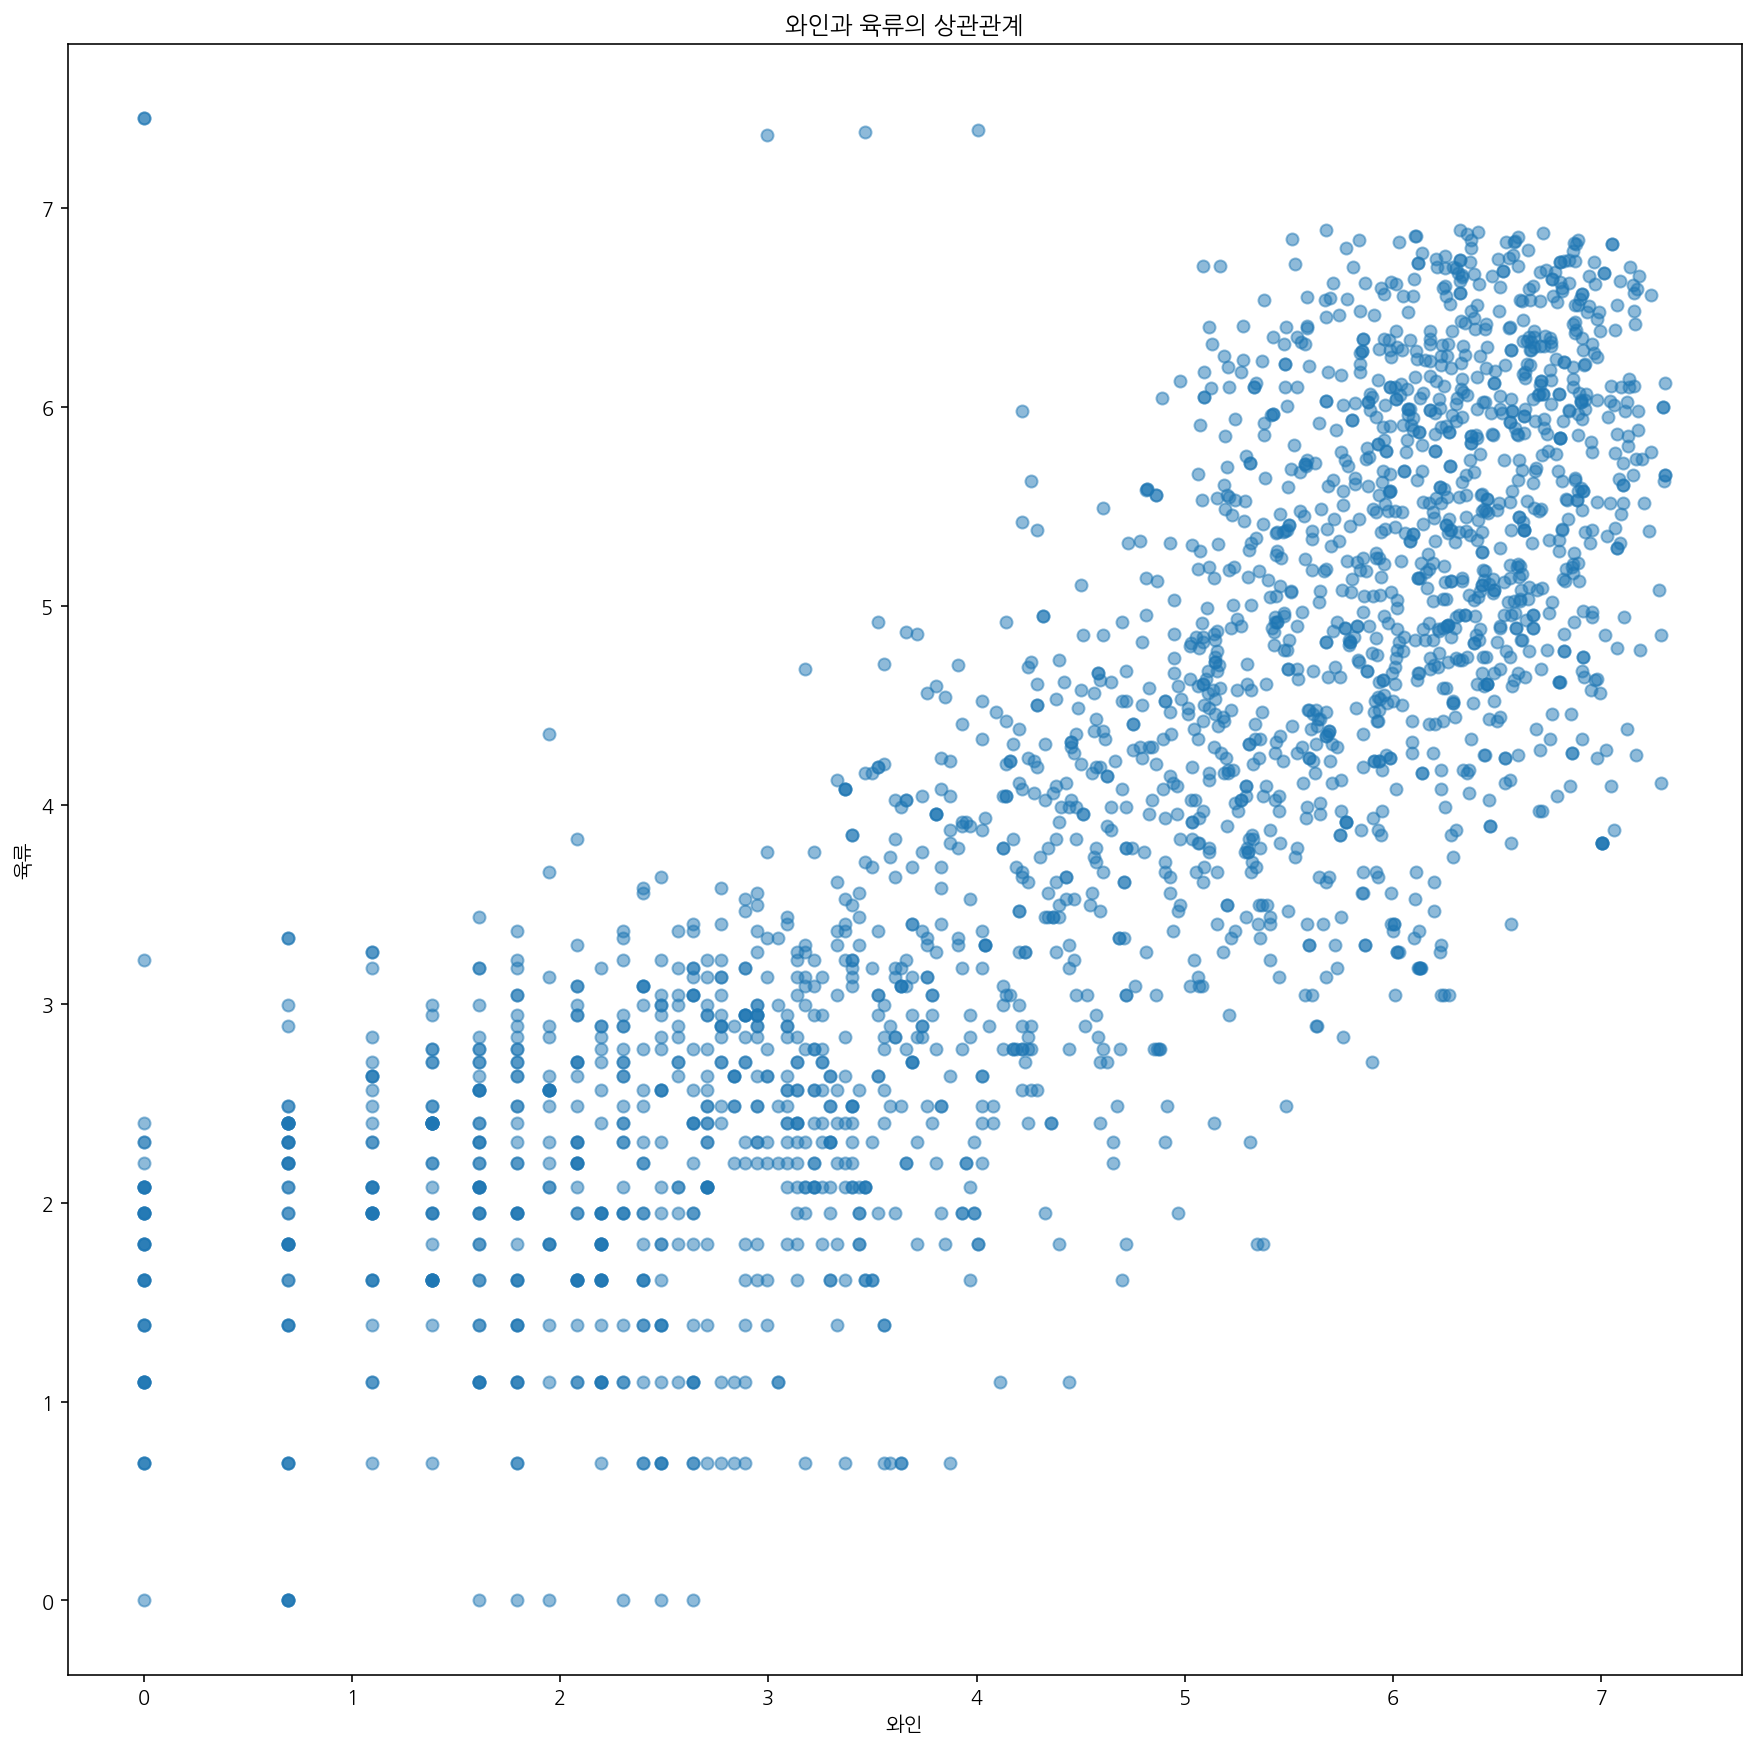

In [317]:
X = df['와인지출']
Y = df['육류지출']

X=np.log(X)
Y=np.log(Y)

plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(X,Y,alpha=0.5)
plt.title("와인과 육류의 상관관계")
plt.xlabel("와인")
plt.ylabel("육류")
plt.show()
 # 와인과 육류를 양의 상관관계를 띄고 있다.

In [300]:
# 상관분석
df.corr(method='pearson')
# 이렇게 보니 눈아파 죽겠다

,ID,태어난연도,연간 가구소득,마지막구매일수,와인지출,과일지출,육류지출,생선지출,과자지출,골드지출,...,마지막캠페인수락유무,불만접수유무,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이,고객정보입력연도,고객정보입력월,고객정보입력일
ID,1.000000,0.000028,0.012996,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,...,-0.021968,0.033883,-0.000146,-0.018256,-0.027566,-0.000146,-0.000393,-0.006414,0.018072,-0.031973
태어난연도,0.000028,1.000000,-0.160899,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,...,0.021325,-0.030128,-0.090199,-0.114623,-0.136857,-0.090199,-0.998379,-0.028188,0.024246,-0.009193
연간 가구소득,0.012996,-0.160899,1.000000,-0.004061,0.576903,0.428791,0.577805,0.437564,0.436131,0.321938,...,0.132867,-0.027187,-0.290858,0.661179,0.410182,-0.290858,0.161654,0.022381,-0.014909,-0.030999
마지막구매일수,-0.046524,-0.019871,-0.004061,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,...,-0.198437,0.013231,0.018053,0.019661,-0.001093,0.018053,0.018322,-0.026084,0.014040,0.010877
와인지출,-0.022878,-0.157773,0.576903,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,...,0.247254,-0.039007,-0.351909,0.901185,0.643620,-0.351909,0.148484,-0.154188,0.046139,-0.000413
과일지출,0.004600,-0.017917,0.428791,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,...,0.125289,-0.005166,-0.394853,0.599186,0.340229,-0.394853,0.014719,-0.055150,0.003741,-0.020998
육류지출,-0.004437,-0.030872,0.577805,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,...,0.236335,-0.023483,-0.502208,0.840489,0.403908,-0.502208,0.026077,-0.082472,0.018390,-0.012561
생선지출,-0.024475,-0.041625,0.437564,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,...,0.111331,-0.020953,-0.425503,0.628052,0.345769,-0.425503,0.037641,-0.067611,0.006429,-0.018648
과자지출,-0.007642,-0.018133,0.436131,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,...,0.117372,-0.022485,-0.383137,0.556612,0.356927,-0.383137,0.013897,-0.073366,0.017346,0.000516
골드지출,-0.013438,-0.061818,0.321938,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,...,0.139850,-0.030861,-0.266095,0.519586,0.435861,-0.266095,0.053503,-0.142530,0.031187,0.000523


<AxesSubplot:>

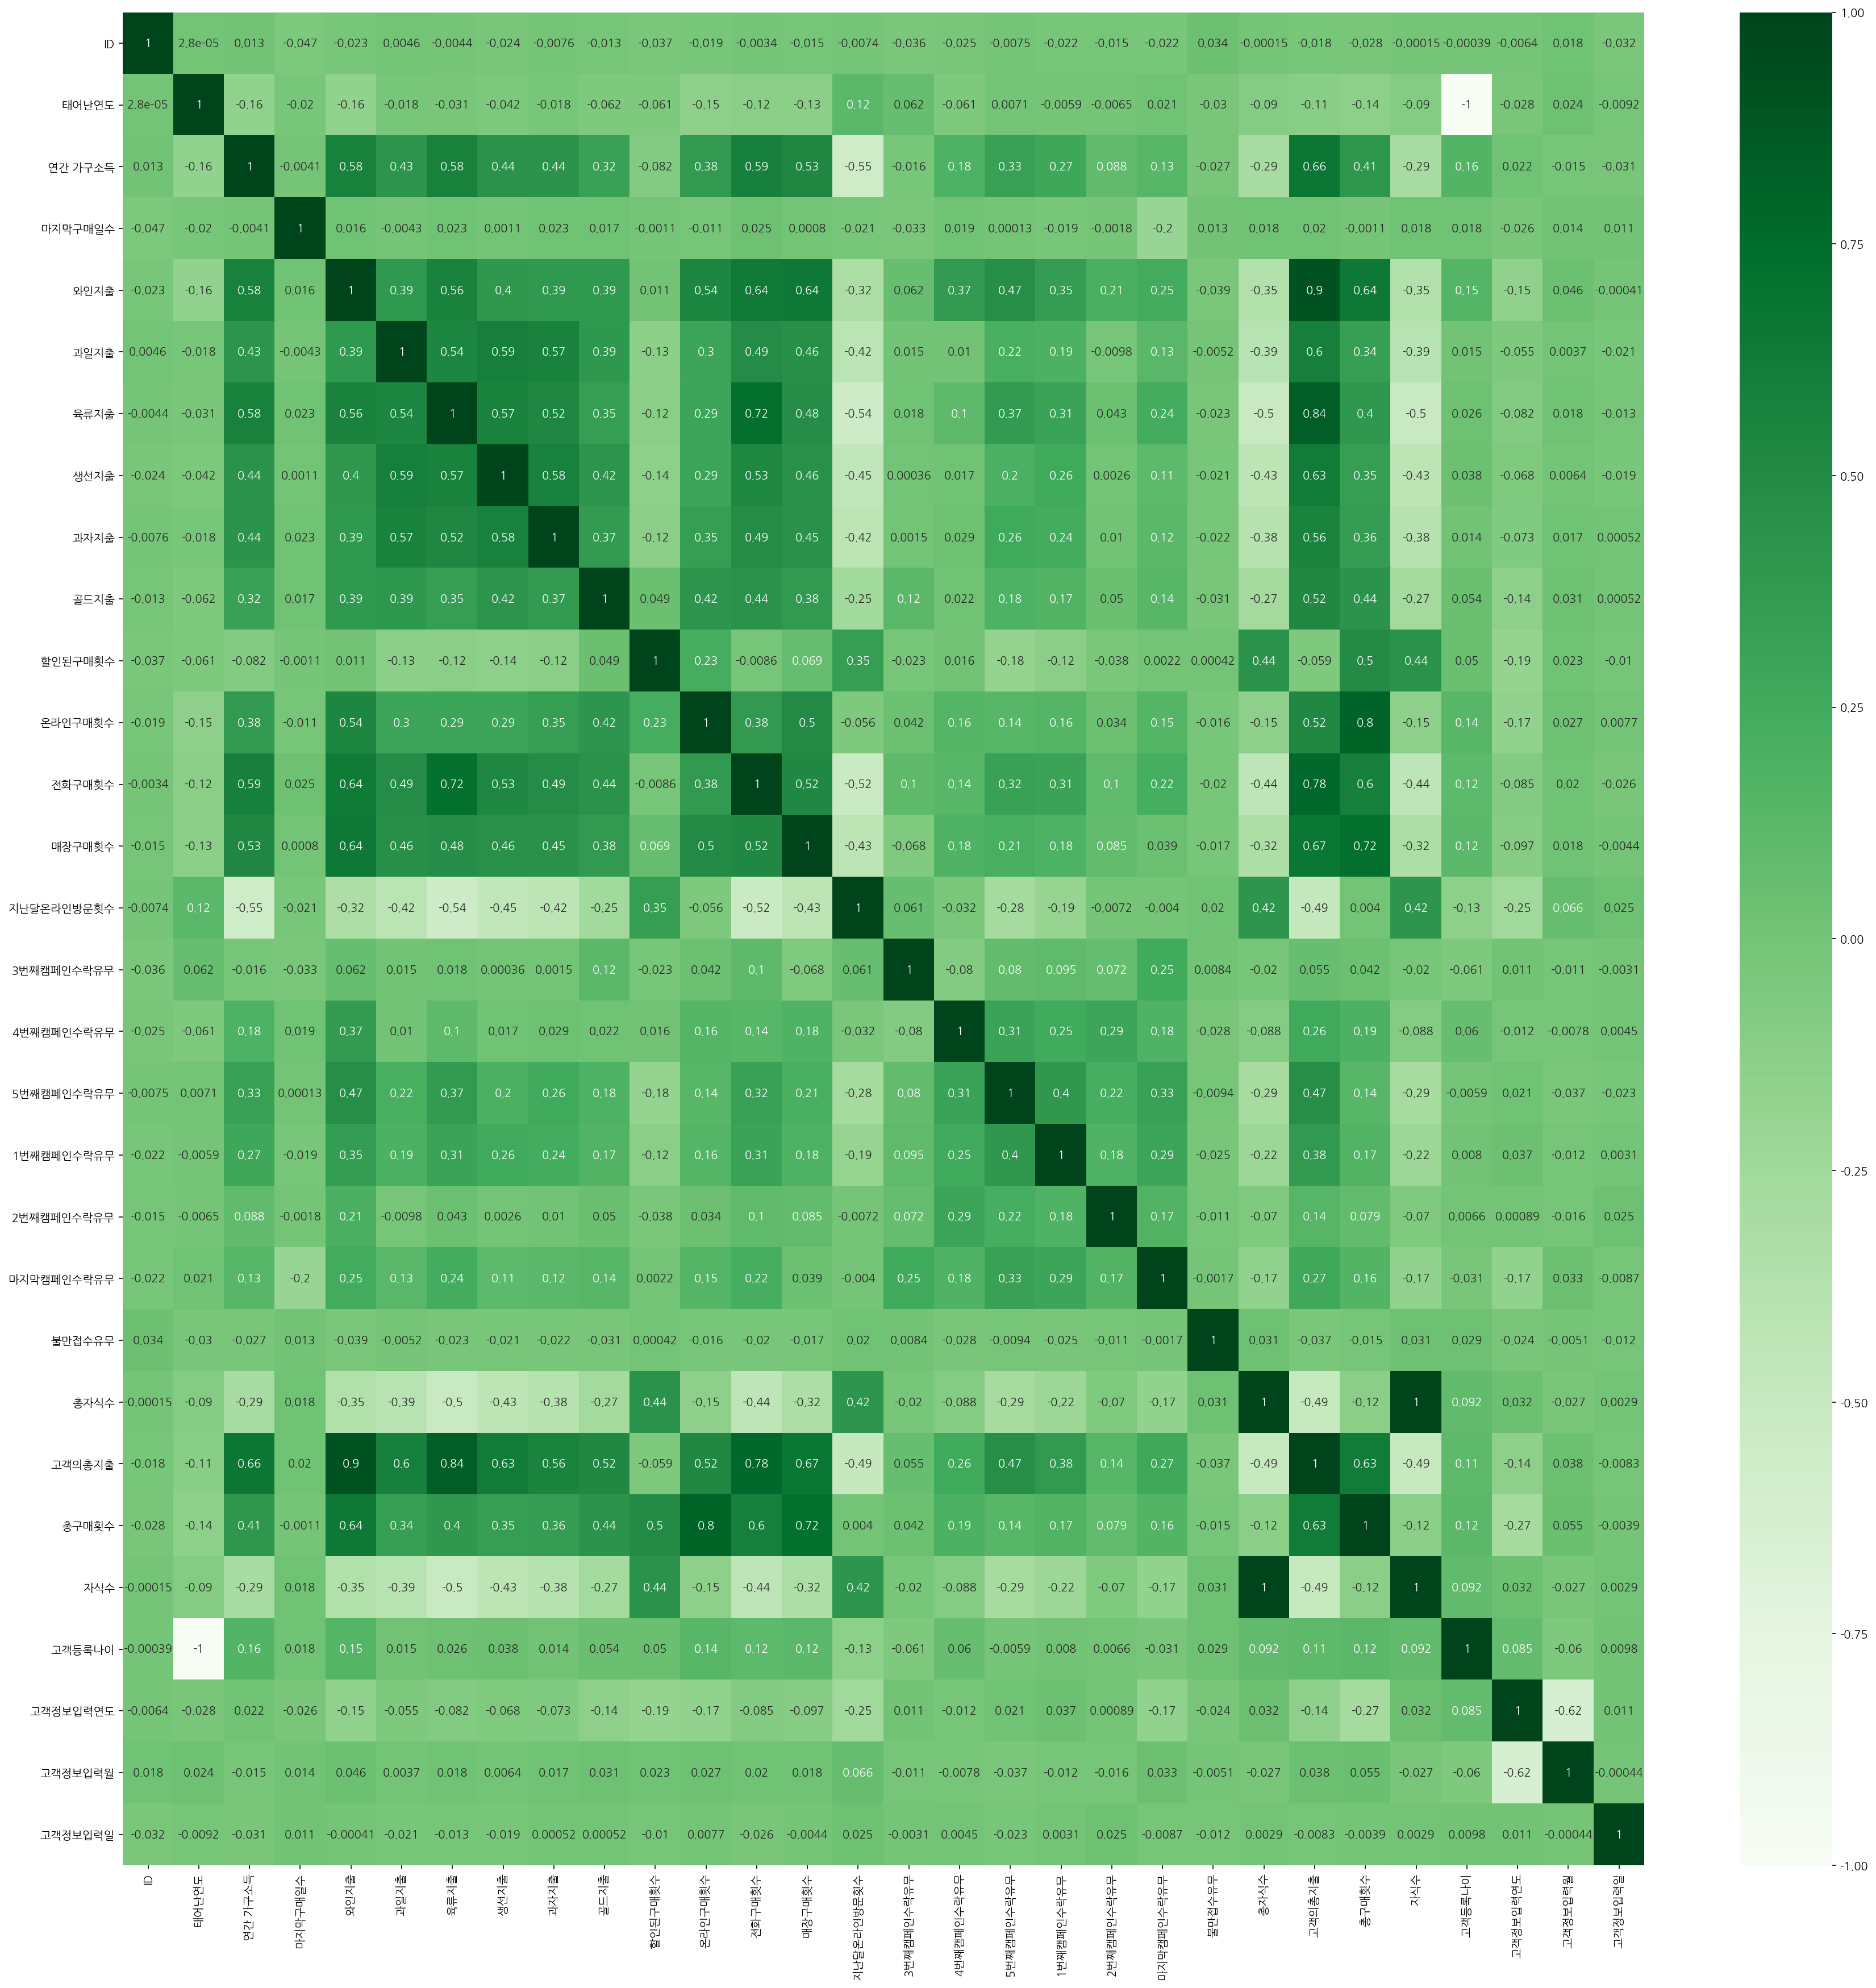

In [302]:
#heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (30,30)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [307]:
df

,ID,태어난연도,학력,결혼여부,연간 가구소득,고객정보입력년월일,마지막구매일수,와인지출,과일지출,육류지출,...,소속국가,총자식수,고객의총지출,총구매횟수,자식수,고객등록나이,고객정보입력연도,고객정보입력월,고객정보입력일,고객정보입력요일
1642,6653,1970,박사,기혼,55158.0,2012-07-30,72,293,0,87,...,SP,2,407,25,2,42,2012,7,30,월
837,6181,1950,2년제_학위,동거,52203.0,2012-07-31,36,488,21,238,...,US,0,831,33,0,62,2012,7,31,화
2222,10001,1985,2년제_학위,동거,7500.0,2012-08-01,98,5,17,17,...,SP,1,86,19,1,27,2012,8,1,수
1509,2611,1959,석사,동거,82576.0,2012-08-01,66,1206,55,445,...,SA,0,1892,20,0,53,2012,8,1,수
1398,7118,1957,학사졸업,기혼,73803.0,2012-08-01,61,833,80,363,...,CA,1,1502,28,1,55,2012,8,1,수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,8093,1969,석사,기혼,79734.0,2014-06-28,72,572,8,232,...,SP,0,852,15,0,45,2014,6,28,토
1616,1371,1976,학사졸업,미혼,79941.0,2014-06-28,72,123,164,266,...,AUS,0,954,17,0,38,2014,6,28,토
2201,6722,1954,박사,기혼,70421.0,2014-06-28,98,479,28,136,...,CA,1,753,29,1,60,2014,6,28,토
1122,7300,1952,학사졸업,이혼,69142.0,2014-06-29,50,448,4,34,...,IND,1,531,24,1,62,2014,6,29,일
